**For qSVM training: CPU can handle low feature count, but GPU and TPU can do more. However, they have free usage limits so probably start with CPU.**

**Setup**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

# data_new = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/pd_diagnosis/normalized_df.csv')

data_new = pd.read_csv('/content/gdrive/My Drive/pd_diagnosis/normalized_df.csv')
data_new.drop("Unnamed: 0", axis=1, inplace=True)
data_new.head()

,healthCode,recordId_x,recordId_y,Diagnosis,Age,Gender,accel_walking_outbound.json.items,deviceMotion_walking_outbound.json.items,pedometer_walking_outbound.json.items,accel_walking_return.json.items,...,Jitter,Shimmer,HNR_D,CPP,PSD,H1_H2,GNE_max_4500Hz,Hfno_6000Hz,Shim_dB,ABI
0,af11ff58-dffe-4930-bf52-584e0f1cbc5d,569e970c-66ae-4c12-b606-0eb8ef5a5add,26251036-11d5-41a9-8b5a-941a21c90e9d,1,1.463998,0,0.593584,0.593668,0.593719,0.593731,...,-0.469737,-0.418874,-7.401433,0.120140,-0.208316,0.008227,-0.154157,-0.010777,-0.288481,-0.427349
1,32e23bb4-c2ca-489e-a580-d432d05e015e,265dc682-1f12-4b25-9765-3a03cd641b33,263b7474-d753-42e7-98a4-168869eb94cb,0,1.002380,0,0.438058,0.438041,0.438088,0.438126,...,-0.244610,-0.283953,0.595483,0.593640,-0.189880,-0.036643,-0.318942,0.688017,-0.121095,0.273296
2,67440fc1-d449-4f9a-8f0d-8d8a77a492dc,2340a276-7933-4de5-a563-c92fca73b7da,6c9f0267-5362-4c88-bbe7-f250d0e4a462,0,-1.594218,0,1.202960,1.202877,1.202778,1.202694,...,0.417778,-0.431532,0.280681,0.592604,-0.187832,0.031011,0.244707,-0.147795,-0.304764,-0.284094
3,e8b3b9a4-a48e-4212-aad8-0ee8d9a4f911,f1cf8e58-8b49-42c4-8620-c625b2689194,71ffce5b-73f3-4f71-8aee-215a8fbd3353,1,0.656167,0,-1.202174,-1.202365,-1.202559,-1.202817,...,-0.639159,-0.340148,-0.661027,0.398740,-0.200122,0.128533,1.014009,-0.235911,-0.189482,-0.973663
4,98753b69-11dd-43f4-8eff-a54e052da982,5f64edbd-b58b-44f8-9d78-2876be5ab591,7cf01cee-7160-475c-8fe6-c809e6c34c7d,1,0.252252,0,-0.369844,-0.369682,-0.369523,-0.369449,...,-0.621270,0.796280,-0.145085,-0.351019,-0.333954,0.014231,-0.473523,-0.543959,0.927524,0.666605


**Random Forest Feature Importance Plot:**

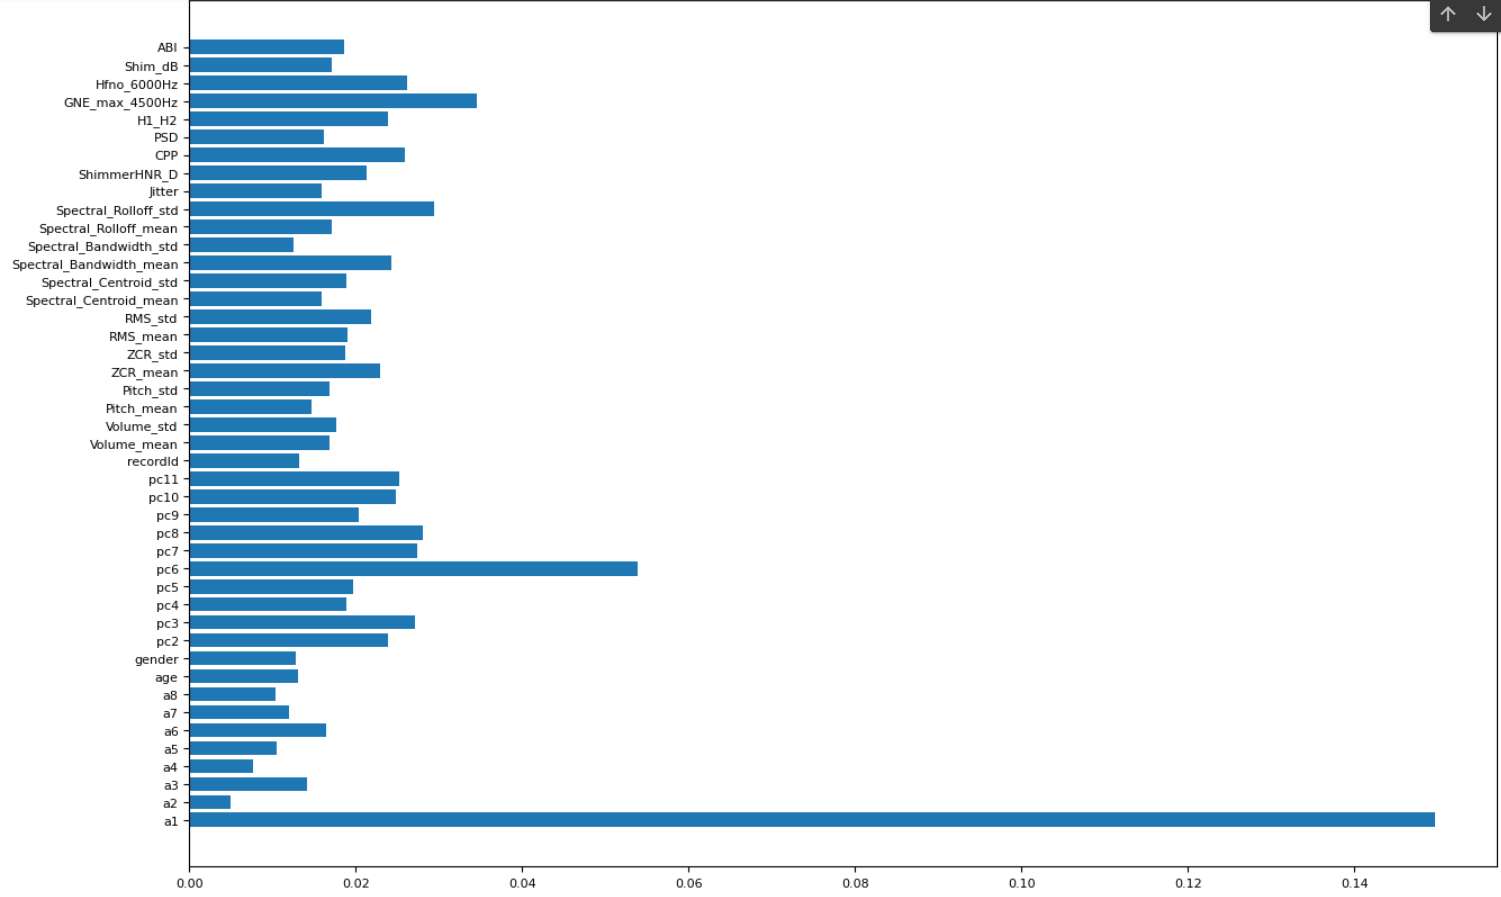

**Naive Bayes SHAP Values**

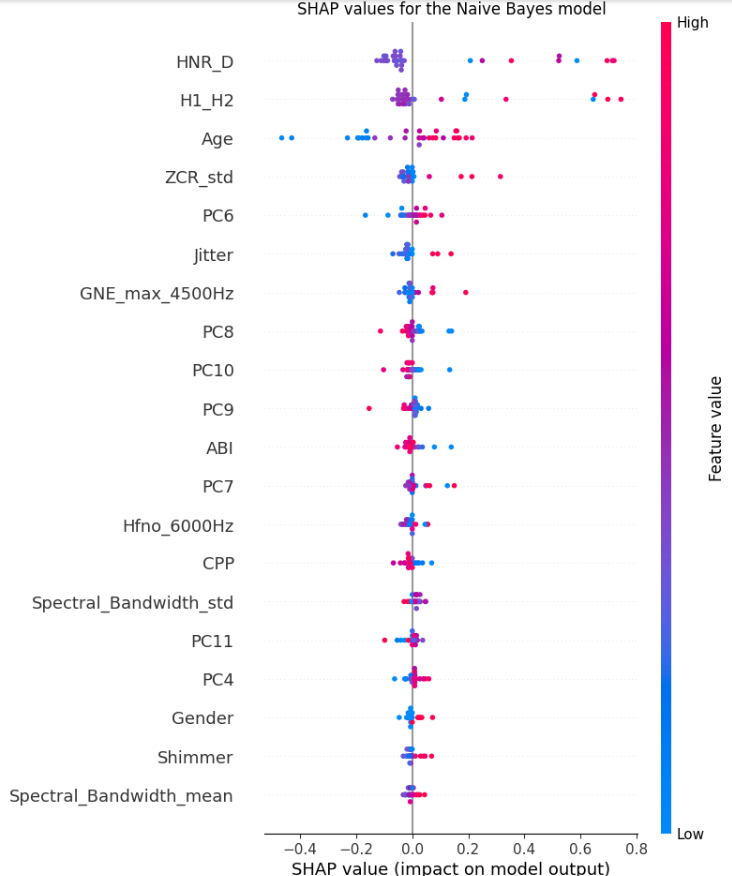

**Preparing Data**

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

features_final = data_new.loc[:, 'Age':'ABI']
labels_final = data_new['Diagnosis']

kf_final = KFold(n_splits=4, shuffle=True, random_state=111)

accuracy_scores_rf = []
recall_scores_rf = []
precision_scores_rf = []
feature_importances_rf = []

for train_index, test_index in kf_final.split(features_final):
    X_train_final, X_test_final = features_final.iloc[train_index], features_final.iloc[test_index]
    y_train_final, y_test_final = labels_final.iloc[train_index], labels_final.iloc[test_index]

**Classical SVM Models**

In [ ]:
# gait and voice and demographics svm linear

import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train_final, y_train_final)

y_pred = svm_classifier.predict(X_test_final)

accuracy = accuracy_score(y_test_final, y_pred)
precision = precision_score(y_test_final, y_pred, average='weighted')
recall = recall_score(y_test_final, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_final, y_pred))

Accuracy: 0.84
Precision: 0.84
Recall: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.83      0.90      0.86        21

    accuracy                           0.84        37
   macro avg       0.84      0.83      0.83        37
weighted avg       0.84      0.84      0.84        37



In [ ]:
# gait and voice and demographics svm rbf

import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

svm_classifier = SVC(kernel='rbf')

svm_classifier.fit(X_train_final, y_train_final)

y_pred = svm_classifier.predict(X_test_final)

accuracy = accuracy_score(y_test_final, y_pred)
precision = precision_score(y_test_final, y_pred, average='weighted')
recall = recall_score(y_test_final, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_final, y_pred))

Accuracy: 0.81
Precision: 0.83
Recall: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.62      0.74        16
           1       0.77      0.95      0.85        21

    accuracy                           0.81        37
   macro avg       0.84      0.79      0.80        37
weighted avg       0.83      0.81      0.80        37



In [ ]:
# gait and voice and demographics svm poly

import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

svm_classifier = SVC(kernel='poly')

svm_classifier.fit(X_train_final, y_train_final)

y_pred = svm_classifier.predict(X_test_final)

accuracy = accuracy_score(y_test_final, y_pred)
precision = precision_score(y_test_final, y_pred, average='weighted')
recall = recall_score(y_test_final, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_final, y_pred))

Accuracy: 0.57
Precision: 0.32
Recall: 0.57

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.57      1.00      0.72        21

    accuracy                           0.57        37
   macro avg       0.28      0.50      0.36        37
weighted avg       0.32      0.57      0.41        37



**qSVM Preparation**

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 57.6 MB/s eta 0:00:00


**Pick features (so far we know that having 9 features works well, 31 is too slow, anything over 32 will crash)**

In [ ]:
X_train_final.columns

Index(['Age', 'Gender', 'accel_walking_outbound.json.items',
       'deviceMotion_walking_outbound.json.items',
       'pedometer_walking_outbound.json.items',
       'accel_walking_return.json.items',
       'deviceMotion_walking_return.json.items',
       'pedometer_walking_return.json.items', 'accel_walking_rest.json.items',
       'deviceMotion_walking_rest.json.items', 'PC2', 'PC3', 'PC4', 'PC5',
       'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'Volume_mean', 'Volume_std',
       'Pitch_mean', 'Pitch_std', 'ZCR_mean', 'ZCR_std', 'RMS_mean', 'RMS_std',
       'Spectral_Centroid_mean', 'Spectral_Centroid_std',
       'Spectral_Bandwidth_mean', 'Spectral_Bandwidth_std',
       'Spectral_Rolloff_mean', 'Spectral_Rolloff_std', 'Jitter', 'Shimmer',
       'HNR_D', 'CPP', 'PSD', 'H1_H2', 'GNE_max_4500Hz', 'Hfno_6000Hz',
       'Shim_dB', 'ABI'],
      dtype='object')

In [ ]:
keep = ['Age', 'accel_walking_outbound.json.items', 'PC6', 'Spectral_Rolloff_std','Volume_mean', 'Pitch_std', 'Jitter', 'Shimmer', 'GNE_max_4500Hz', 'ABI']

In [ ]:
for column in X_train_final.columns:
  if column not in keep:
    X_train_final.drop(column, axis=1, inplace=True)

X_train_final.head()

,Age,accel_walking_outbound.json.items,PC6,Volume_mean,Pitch_std,Spectral_Rolloff_std,Jitter,Shimmer,GNE_max_4500Hz,ABI
0,1.463998,0.593584,0.873249,-0.166770,1.245192,0.335098,-0.469737,-0.418874,-0.154157,-0.427349
1,1.002380,0.438058,-0.536274,-0.079297,0.468494,0.141320,-0.244610,-0.283953,-0.318942,0.273296
2,-1.594218,1.202960,-0.179135,-0.117067,0.646752,0.125705,0.417778,-0.431532,0.244707,-0.284094
3,0.656167,-1.202174,0.763524,-0.120015,0.556800,1.207415,-0.639159,-0.340148,1.014009,-0.973663
4,0.252252,-0.369844,-0.257494,-0.611006,-0.514212,0.663184,-0.621270,0.796280,-0.473523,0.666605


In [ ]:
for column in X_test_final.columns:
  if column not in keep:
    X_test_final.drop(column, axis=1, inplace=True)

X_test_final.head()

,Age,accel_walking_outbound.json.items,PC6,Volume_mean,Pitch_std,Spectral_Rolloff_std,Jitter,Shimmer,GNE_max_4500Hz,ABI
7,0.483061,0.546266,-1.047122,-0.662722,2.262274,2.441228,0.078326,-0.306735,-0.606356,0.512755
9,-1.248005,0.425551,-0.159851,-0.697458,-0.779234,0.222961,0.295215,0.262379,-0.534802,0.583416
10,-1.940431,0.584168,-0.591225,-0.509048,0.831680,0.382007,-0.676674,-0.740060,1.085472,-1.162176
12,-0.382472,1.211463,0.034062,-0.752651,-0.264865,0.138897,1.852618,2.094907,-0.545914,0.983360
13,0.194550,0.215767,-0.040779,-0.108892,0.819062,0.545778,1.710812,1.164254,-0.701395,0.949989


In [ ]:
X_train_final.shape

(111, 10)

In [ ]:
X_test_final.shape

(37, 10)

**Setting up quantum kernel**

In [ ]:
import pennylane as qml
from pennylane import numpy as np

n_qubits = len(X_train_final.columns)
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_kernel(x1, x2):
    qml.templates.AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(qml.templates.AngleEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

def kernel_matrix(X1, X2):
    return np.array([[quantum_kernel(x1, x2) for x2 in X2] for x1 in X1])

**Quantum kernel with detailed logs (good to measure progress with sets with high number of features)**

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import time

n_qubits = len(X_train_final.columns)
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_kernel(x1, x2):
    qml.templates.AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(qml.templates.AngleEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

def kernel_matrix_with_logging(X1, X2):
    N = len(X1)
    M = len(X2)
    K = np.zeros((N, M))
    start_time = time.time()
    for i in range(N):
        for j in range(M):
            K[i, j] = quantum_kernel(X1[i], X2[j])
        if i % 10 == 1:
            elapsed_time = time.time() - start_time
            progress = (i * M) / (N * M)
            estimated_total_time = elapsed_time / progress if progress > 0 else 0
            estimated_remaining_time = estimated_total_time - elapsed_time
            print(f"Progress: {i}/{N} rows completed")
            print(f"Elapsed time: {elapsed_time:.2f} seconds")
            print(f"Estimated remaining time: {estimated_remaining_time:.2f} seconds")
    return K

**Fit model on entire datset**

In [ ]:
# Convert df to numpy array for kernel compatibility

X_train = X_train_final.to_numpy()
y_train = y_train_final.to_numpy()
X_test = X_test_final.to_numpy()
y_test = y_test_final.to_numpy()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

# Can use kernel_matrix_with_logging if preferred
K_train = kernel_matrix(X_train, X_train)
K_test = kernel_matrix(X_test, X_train)

cld = SVC(kernel='precomputed')
cld.fit(K_train, y_train)

y_pred = cld.predict(K_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC/AUC Score: {roc_auc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.92
Precision: 0.93
Recall: 0.92
ROC/AUC Score: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.88      1.00      0.93        21

    accuracy                           0.92        37
   macro avg       0.94      0.91      0.91        37
weighted avg       0.93      0.92      0.92        37



**Fit model on subset**

In [ ]:
# Convert df to numpy array for kernel compatibility

X_train = X_train_final.to_numpy()
y_train = y_train_final.to_numpy()
X_test = X_test_final.to_numpy()
y_test = y_test_final.to_numpy()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

# Can use kernel_matrix_with_logging if preferred
K_train = kernel_matrix(X_train[:16], X_train[:16])
K_test = kernel_matrix(X_test[:12], X_train[:16])

cld = SVC(kernel='precomputed')
cld.fit(K_train, y_train[:16])

y_pred = cld.predict(K_test[:12])

accuracy = accuracy_score(y_test[:12], y_pred)
precision = precision_score(y_test[:12], y_pred, average='weighted')
recall = recall_score(y_test[:12], y_pred, average='weighted')
roc_auc = roc_auc_score(y_test[:12], y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC/AUC Score: {roc_auc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test[:12], y_pred))

Accuracy: 0.92
Precision: 0.93
Recall: 0.92
ROC/AUC Score: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.88      0.93         8

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12



In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test[:12], y_pred, average='weighted')

0.9185185185185185